In [2]:
from dotenv import load_dotenv 
load_dotenv()

True

In [10]:
from langchain.chat_models import init_chat_model
from langchain.tools import tool
from langchain.agents import create_agent

In [4]:
model = init_chat_model("groq:qwen/qwen3-32b")

In [6]:
@tool 
def get_weather(location: str) -> str:
    """Get the weather at a location"""
    return f"It's sunny in {location}"

In [7]:
model_with_tools = model.bind_tools([get_weather])

In [8]:
response = model_with_tools.invoke("What is the weather like in Boston?")
print(response)

content='' additional_kwargs={'reasoning_content': "Okay, the user is asking about the weather in Boston. I need to use the get_weather function. Let me check the function parameters. It requires a location, which in this case is Boston. So I'll call the function with location set to Boston. Make sure the JSON is correctly formatted with the name and arguments. No other parameters are needed. Just the location. Alright, that should do it.\n", 'tool_calls': [{'id': '8z58h04pq', 'function': {'arguments': '{"location":"Boston"}', 'name': 'get_weather'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 106, 'prompt_tokens': 154, 'total_tokens': 260, 'completion_time': 0.213072741, 'prompt_time': 0.171728752, 'queue_time': 0.211149115, 'total_time': 0.384801493, 'completion_tokens_details': {'reasoning_tokens': 82}}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_efa9879028', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None

In [9]:
for tool_call in response.tool_calls:
    print(f"Tool: {tool_call['name']}")
    print(f"Args: {tool_call['args']}")

Tool: get_weather
Args: {'location': 'Boston'}


In [11]:
def get_weather(city: str) -> str:
    """Get the weather for a city."""
    return f"The weather in {city} is sunny."

In [12]:
agent = create_agent(
    model = model,
    tools = [get_weather],
    system_prompt = "You are a helpful assistant."
)

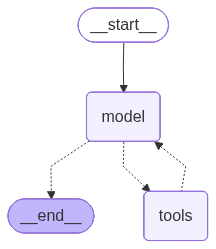

In [13]:
agent

In [14]:
response = agent.invoke({"messages": "What is the weather like in Boston?"})
response

{'messages': [HumanMessage(content='What is the weather like in Boston?', additional_kwargs={}, response_metadata={}, id='38925a85-e5ad-4927-b177-3ba601b57a28'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the weather in Boston. I need to use the get_weather function. Let me check the function parameters. The required parameter is "city", which should be a string. The user mentioned Boston, so I should call the function with city set to "Boston". Make sure the JSON is correctly formatted with the city name in quotes. Alright, that\'s all I need to make the tool call.\n', 'tool_calls': [{'id': '6kddb906v', 'function': {'arguments': '{"city":"Boston"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 160, 'total_tokens': 270, 'completion_time': 0.190916082, 'prompt_time': 0.007666781, 'queue_time': 0.132228618, 'total_time': 0.198582863, 'completion_tokens_deta

In [18]:
print(response["messages"][-1].content)

The weather in Boston is currently sunny! ☀️ Let me know if you need more details.


In [20]:
@tool 
def get_weather(location: str) -> str:
    """Get the weather at a location"""
    return f"It's sunny in {location}"

In [21]:
messages = [{"role": "user", "content": "What's the weather in Boston?"}]
ai_msg = model_with_tools.invoke(messages)
messages.append(ai_msg)

for tool_call in ai_msg.tool_calls:
    tool_result = get_weather.invoke(tool_call)
    messages.append(tool_result)

final_response = model_with_tools.invoke(messages)
print(final_response.text)

The weather in Boston is sunny.


In [22]:
messages

[{'role': 'user', 'content': "What's the weather in Boston?"},
 AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the weather in Boston. I need to use the get_weather function. The function requires a location parameter. Boston is the location here. So I should call get_weather with location set to "Boston". Let me make sure there\'s no typo. Everything looks good. Let me format the tool call correctly.\n', 'tool_calls': [{'id': 'ccjjp6zpy', 'function': {'arguments': '{"location":"Boston"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 153, 'total_tokens': 245, 'completion_time': 0.151222116, 'prompt_time': 0.006178075, 'queue_time': 0.088595031, 'total_time': 0.157400191, 'completion_tokens_details': {'reasoning_tokens': 68}}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs'